# Lab 1: Immunotherapy Survival Rates

The purpose of this lab is to introduce you to the python modules we will be using for this class, as well as the effect of cancer immunotherapy on patient survival rates.

## **Note: This lab is to be done alone, as it is an assessment of programming skills required for this class.**

This lab, as well as following labs, will use the datascience API. 
For more information about the datascience Table API, see http://data8.org/datascience/tutorial.html#getting-started.

One of the most important skills you can learn while coding is how to use available resources, such as API docs and google search, to learn about new functions and APIs.
**For this reason, some lab questions will require new functions not described in the lab. Please reference the Table API for guidence.**

### **Read all text in this lab! Skipping explanations will inhibit your ability to answer questions.**

## 1. Imports

Imports are external dependencies you need to run your notebook. For most of the labs, we will be using the 'datascience' package. Functionality included in this package are listed at http://data8.org/datascience/tutorial.html#getting-started. We will also be using some extra packages for graphing.

To run the cell below, click the 'play' button above in the tools panel at the top of your page.

In [58]:
# imports
from datascience import Table
import matplotlib
matplotlib.use('Agg')
from datascience import Table
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<h2 style="color:red">** Question 1**</h2> 
What is the purpose of an import?

Answer here:
To load in prewritten modules to be used.

## 2. Importing and Reading Data

We can use Tables, imported above, to import and read comma delimited files (csv) or tab delimited files (tsv) into our notebook. As an exercise, we will import data containing survival rates of patients treated with nivolumab (NIVO), an immunotherapy treatment. This data came from the following abstract: http://cancerres.aacrjournals.org/content/76/14_Supplement/CT001.

There are two cohorts in this study. The first cohort, labeled (Survival rate (NIVO treated N=17)) contains 17 patients treated with NIVO. The second cohort, labeled (Survival rate (All patients N=107)), contains both patients treated with NIVO and patients treated with NIVO who were priorly treated with other therapies.


First, read in the data to a table:

In [59]:
# Read in csv file into a table
table = Table.read_table('https://raw.githubusercontent.com/data-8/mcb-88-connector/gh-pages/data/lab1/NIVO_patient_survival.csv')

### Now, print the table:

In [60]:
print(table)

Months | Survival rate (NIVO treated N=17) | Survival rate (All patients N=107)
12     | 64.7                              | 62.7
24     | 47.1                              | 48
36     | 41.2                              | 42.1
48     | 35.3                              | 34.8
60     | 35.3                              | 33.6


This table contains survival rates over 60 Months for patients with advanced melanoma treated with NIVO, an immunotherapy treatment.

## 3. Accessing and Manipulating Data Tables
Now, we can use our table to learn more about our dataset. Let's print the survival rates of patients treated with NIVO.

In [61]:
table.column('Survival rate (NIVO treated N=17)')

array([ 64.7,  47.1,  41.2,  35.3,  35.3])

For our next exercise, we will look at the survival rates for the last 2 years (months > 36).

In [62]:
table.where(table['Months'] > 36)

Months,Survival rate (NIVO treated N=17),Survival rate (All patients N=107)
48,35.3,34.8
60,35.3,33.6


<h2 style="color:red">** Question 2**</h2> 

What do you notice about the survival rates for 48 adn 60 months for the NIVO treated cohort?

Answer here:

The values are the same.


## 5. Visualizing Data

The table command has many built in functions used to visualize your data. Built in plots allow you to make line plots, scatter plots, box plots and others. 

<h2 style="color:red">** Question 3**</h2> 

Plot the survival rates for both cohorts (Nivo treated and all patients) on a line graph. **(Hint: you will need to use the plot function, specified in the datascience API.)**

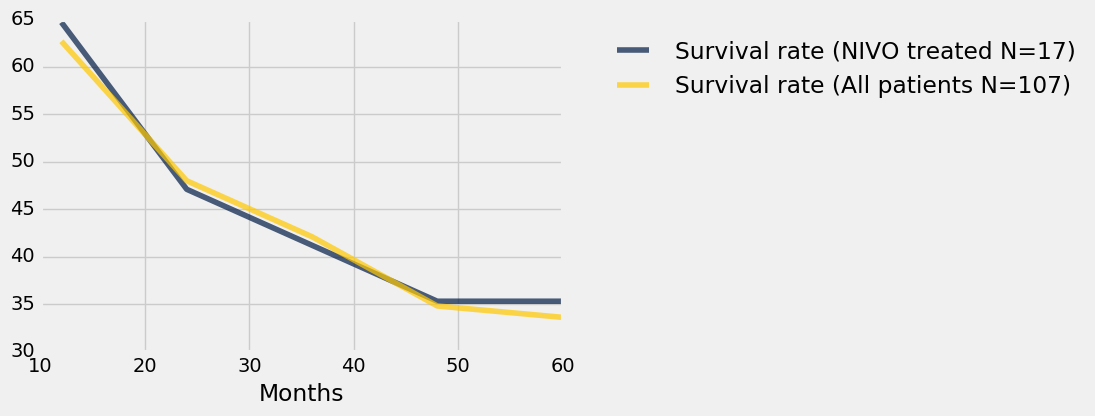

In [63]:
# Answer here:
table.plot('Months')


## 6. Working with Pandas Dataframes

Sometimes, there are questions we want to ask which the datascience API can not calculate. For these questions, we will convert our tables to a pandas dataframe (http://pandas.pydata.org/pandas-docs/version/0.15.2/10min.html). Pandas dataframes have an expansive API that allow us to answer more complex questions from our data. If you are unfamiliar with pandas dataframes, please take some time to review.

To convert from a datascience table to a pandas dataframe, use the **to_df()** function, specified in the datascience API. To select columns in a pandas dataframe you can call **df[['column name']]** to select a column called 'column_name'.

<h2 style="color:red">** Question 4**</h2> 

Calculate the mean survival rate across both cohorts, for each timespan. Your result should contain 5 values, 1 mean for each timepoint. **(Hint: You will first convert to a pandas dataframe, then use the mean function to calculate mean survival rates of the two cohorts)** Here is a link to the pandas mean function: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html

In [64]:
# Answer here:
# Convert to df and select columns
selected = table.to_df()[['Survival rate (NIVO treated N=17)','Survival rate (All patients N=107)']]

# get mean on row axis
selected.mean(axis=1)

0    63.70
1    47.55
2    41.65
3    35.05
4    34.45
dtype: float64

<h2 style="color:red">** Question 5**</h2> 
What is the mean survival rate at 4 years? At 5 years?

Answer text here (no code required):

35.05, 34.45

<h2 style="color:red">** Question 6**</h2> 

The authors of this datasource state that the survival rates plateau around 48 months. Does the plot support this claim for both cohorts? What implications would this plateau effect have for treated cancer patients?

Answer here:

It means patients are actually getting better, without regression.

<h2 style="color:red">** Question 7**</h2> 

Would you expect a survival rate curve for patients treated with chemotherapy to pleatau? Why or why not?

Answer here:

No pleateau, there is usually regression back to cancer.